                                                        CAR PRICE PREDICTION USING MACHINE LEARNING

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

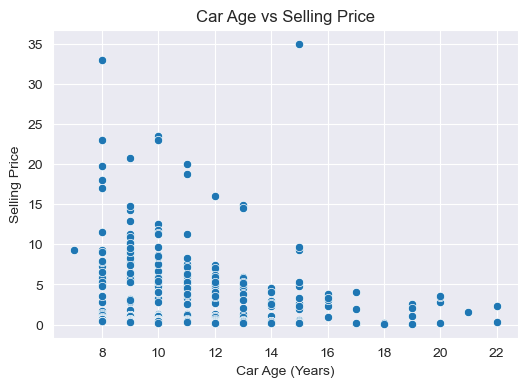

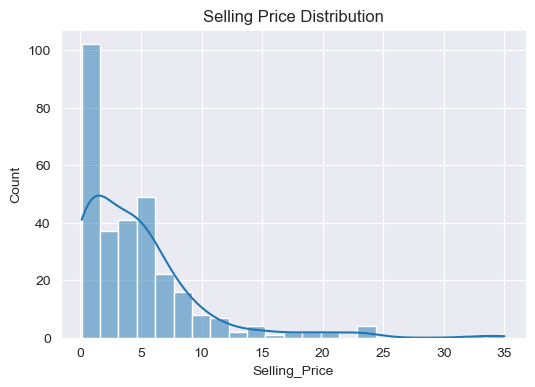

Linear Regression R2: 0.8488707839193154
Linear Regression MAE: 1.2163740193330352
Random Forest R2: 0.9582296580950264
Random Forest MAE: 0.6414311475409826


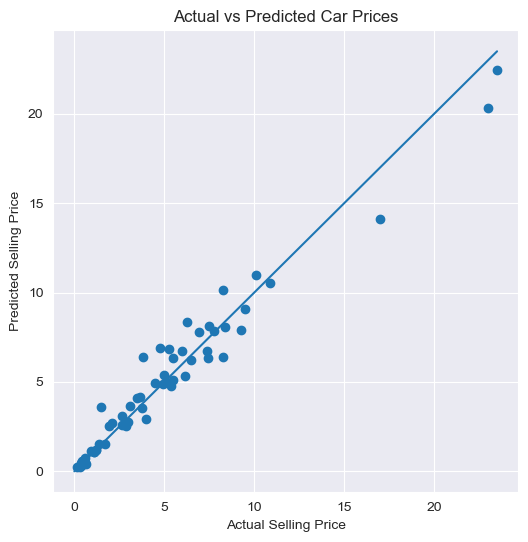

In [1]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

%matplotlib inline

# 2. LOAD DATASET
df = pd.read_csv("car data.csv")

print(df.head())
print(df.info())


# 3. FEATURE ENGINEERING
df['Car_Age'] = 2025 - df['Year']
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)


# 4. DATA VISUALIZATION
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Car_Age'], y=df['Selling_Price'])
plt.title("Car Age vs Selling Price")
plt.xlabel("Car Age (Years)")
plt.ylabel("Selling Price")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['Selling_Price'], kde=True)
plt.title("Selling Price Distribution")
plt.show()


# 5. ENCODE CATEGORICAL VARIABLES
df = pd.get_dummies(df, drop_first=True)


# 6. SPLIT FEATURES AND TARGET
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


# 7. TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 8. LINEAR REGRESSION
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))


# 9. RANDOM FOREST REGRESSOR
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))


# 10. ACTUAL VS PREDICTED GRAPH
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.plot([0, max(y_test)], [0, max(y_test)])
plt.show()
